In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data =pd.read_csv('winequality.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
data.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [4]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [49]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
X = data[cols].values
X

array([[ 7.   ,  0.27 ,  0.36 , ...,  3.   ,  0.45 ,  8.8  ],
       [ 6.3  ,  0.3  ,  0.34 , ...,  3.3  ,  0.49 ,  9.5  ],
       [ 8.1  ,  0.28 ,  0.4  , ...,  3.26 ,  0.44 , 10.1  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [53]:
Y = data.iloc[:,-1].values.reshape(-1,1)
Y

array([[6],
       [6],
       [6],
       ...,
       [6],
       [5],
       [6]], dtype=int64)

In [54]:
X.shape, Y.shape

((6463, 11), (6463, 1))

In [55]:
data.dropna(inplace=True)

In [56]:
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state=42)

In [64]:
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train, y_train)

LinearRegression()

In [65]:
print(regressor.intercept_)

[46.68980587]


In [66]:
print(regressor.coef_)

[[ 5.97136749e-02 -1.35851918e+00 -1.53457236e-01  4.00340414e-02
  -5.99532485e-01  6.05018246e-03 -2.29118707e-03 -4.56550079e+01
   4.01915362e-01  7.53978919e-01  2.69339111e-01]]


In [67]:
score = regressor.predict([[7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8]])
print(score)

[[5.58479683]]


In [68]:
y_pred = regressor.predict(X_test)

In [69]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

      Actual  Predicted
0          5   5.770606
1          6   5.592270
2          4   6.350567
3          6   5.848193
4          7   6.033034
...      ...        ...
1288       6   5.908155
1289       5   5.251750
1290       7   6.064087
1291       6   5.484096
1292       6   5.274171

[1293 rows x 2 columns]


In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [71]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [72]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.57
Mean squared error: 0.52
Root mean squared error: 0.72


<IPython.core.display.Javascript object>

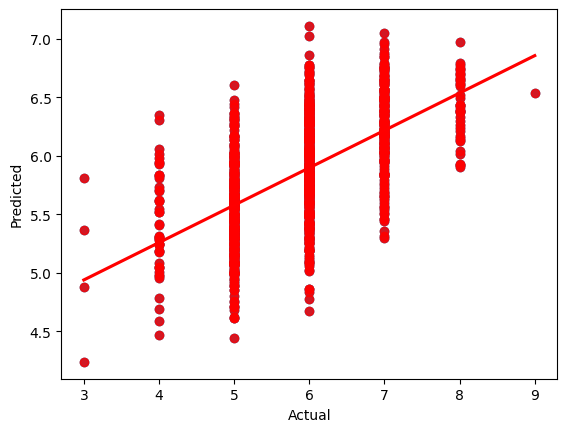

In [24]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');